In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
job_params = {    
    'notch_filt' :     None,
    'n_ch_tif' : 26,
    'convert_plane_ids_to_channel_ids' : False,
    
    'n_init_files' :   1,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : True,
    'override_crosstalk' : 0.36,
    'crosstalk_n_planes' : 4, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [4]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'AH012',
    'date' :          '2024-06-14',
    'expnum' :         [1,2,3,5],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

# Create the job
job = Job('/mnt/md0/runs',exp_str + '-more-planes', tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 100)



Job directory /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes already exists
Loading job directory for AH012_2024-06-14_1-2-3-5-more-planes in /mnt/md0/runs
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param notch_filt
      Updating param n_ch_tif
      Updating param convert_plane_ids_to_channel_ids
      Updating param n_init_files
      Updating param init_file_pool
      Updating param init_file_sample_method
      Updating param subtract_crosstalk
      Updating param override_crosstalk
      Updating param crosstalk_n_planes
      Updating param nonrigid
      Updating param smooth_sigma
      Updating param maxregshift
      Updating param reg_filter_pcorr
      Updating param generate_sample_registered_bins
      Updating param dtype
      Updating param tif_batch_size
      Updating param fs
   Updated main params file


   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/summary/summary.npy
   Loading init tifs with 26 channels
      Loading /mnt/zortex-subjects/AH012/2024-06-14/3/2024-06-14_3_AH012_2P_00001_00009.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/5/2024-06-14_5_AH012_2P_00001_00018.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00009.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/3/2024-06-14_3_AH012_2P_00001_00033.tif
   Loaded 4 files, total 9.12 GB
   Loaded movie with 400 frames and shape 17, 1000, 720
      Enforcing positivity in mean image
   Subtracting crosstalk with forced coefficient 0.360
         Subtracting plane 0 from 13
         Subtracting plane 1 from 14
         Subtracting plane 2 from 15
         Subtracting plane 3 from 16
   Using 3d registration


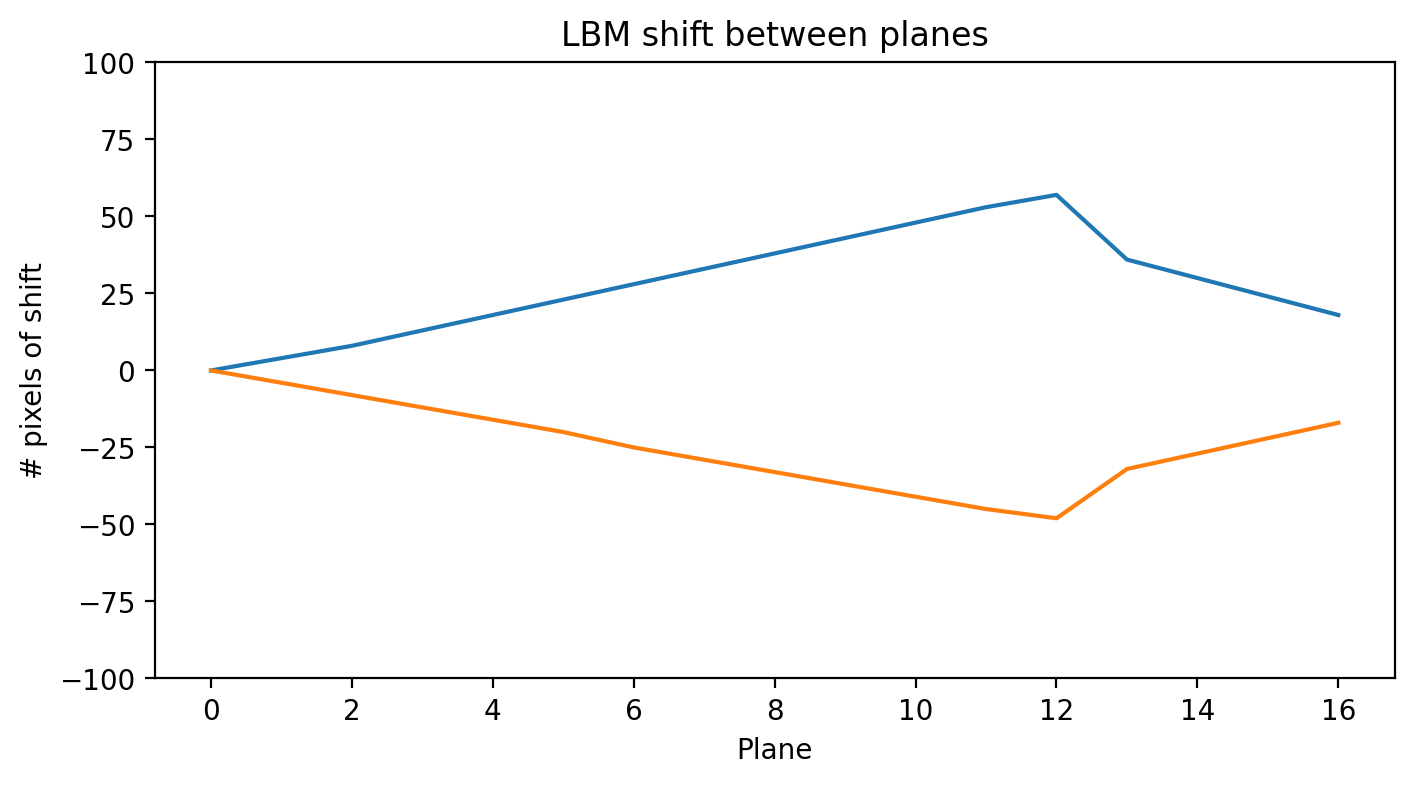

In [6]:
job.params['planes'] = n.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24,  1,  3,
         5,  7])
job.params['3d_reg'] = True
job.params['fuse_shift_override'] = 8
job.params['init_n_frames'] = 400
job.params['override_crosstalk'] = 0.36
job.params['cavity_size'] = 13
job.verbosity = 100
job.params['n_init_files'] = 4
job.run_init_pass()

In [7]:
summary = job.load_summary()

In [8]:
init_mov = n.load(summary['init_mov_path'])

In [9]:
from suite3d import quality_metrics

In [10]:
job.register_gpu_3d()

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data
      Updating self.dirs tag registered_fused_data
   Overriding fuse shift value to 8
   Not clipping frames for registration
Will analyze 165 tifs in 165 batches
   Enforcing positivity
   Launching IO thread
               [Thread] Loading batch 0 

         Memory at batch 0.  Total Used: 143.059 GB, Virtual Available: 375.822 GB, Virtual Used: 127.374 GB, Swap Used: 015.686 GB
Loading Batch 0 of 164
                  [Thread] Before load 0 
Total Used: 143.060 GB, Virtual Available: 375.821 GB, Virtual Used: 127.374 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 0 ready to join after 18.93 sec 

                  [Thread] After load 0 
Total Used: 163.634 GB, Virtual Available: 355.246 GB, Virtual Used: 147.949 GB, Swap Used: 015.686 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 163.634 GB, Virtual Available: 355.246 GB, Virtual Used: 147.949 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 165.974 GB, Virtual Available: 352.906 GB, Virtual Used: 150.289 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 163.681 GB, Virtual Available: 355.200 GB, Virtual Used: 147.995 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 1 

         After IO thread launch:Total Used: 163.681 GB, Virtual Available: 355.200 GB, Virtual Used: 147.995 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [Thre

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:41: RuntimeWarning: invalid value encountered in divide
  dff = df / fs.mean(axis=1,keepdims=True)
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


         After full batch saving:Total Used: 162.457 GB, Virtual Available: 356.423 GB, Virtual Used: 146.772 GB, Swap Used: 015.686 GB
         Memory at batch 1.  Total Used: 162.457 GB, Virtual Available: 356.423 GB, Virtual Used: 146.772 GB, Swap Used: 015.686 GB
Loading Batch 1 of 164


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 1 ready to join after 21.38 sec 

                  [Thread] After load 1 
Total Used: 173.202 GB, Virtual Available: 345.679 GB, Virtual Used: 157.516 GB, Swap Used: 015.686 GB
   Batch 1 IO thread joined
         Memory after IO thread joinTotal Used: 173.202 GB, Virtual Available: 345.679 GB, Virtual Used: 157.516 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.876 GB, Virtual Available: 347.005 GB, Virtual Used: 156.190 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.932 GB, Virtual Available: 348.949 GB, Virtual Used: 154.246 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 2 

                  [Thread] Before load 2 
Total Used: 169.933 GB, Virtual Available: 348.948 GB, Virtual Used: 154.247 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 169.933 GB, Virtu

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 2 ready to join after 22.29 sec 

                  [Thread] After load 2 
Total Used: 179.251 GB, Virtual Available: 339.630 GB, Virtual Used: 163.565 GB, Swap Used: 015.686 GB
   Batch 2 IO thread joined
         Memory after IO thread joinTotal Used: 179.251 GB, Virtual Available: 339.630 GB, Virtual Used: 163.565 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 176.815 GB, Virtual Available: 342.065 GB, Virtual Used: 161.130 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 174.502 GB, Virtual Available: 344.379 GB, Virtual Used: 158.816 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 3 

         After IO thread launch:Total Used: 174.504 GB, Virtual Available: 344.377 GB, Virtual Used: 158.818 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 3 ready to join after 23.32 sec 

                  [Thread] After load 3 
Total Used: 158.056 GB, Virtual Available: 360.825 GB, Virtual Used: 142.371 GB, Swap Used: 015.686 GB
   Batch 3 IO thread joined
         Memory after IO thread joinTotal Used: 158.057 GB, Virtual Available: 360.824 GB, Virtual Used: 142.372 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.810 GB, Virtual Available: 362.070 GB, Virtual Used: 141.125 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.811 GB, Virtual Available: 364.070 GB, Virtual Used: 139.125 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 4 

                  [Thread] Before load 4 
Total Used: 154.812 GB, Virtual Available: 364.069 GB, Virtual Used: 139.126 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 154.812 GB, Virtu

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 4 ready to join after 21.03 sec 

                  [Thread] After load 4 
Total Used: 176.895 GB, Virtual Available: 341.986 GB, Virtual Used: 161.209 GB, Swap Used: 015.686 GB
   Batch 4 IO thread joined
         Memory after IO thread joinTotal Used: 176.895 GB, Virtual Available: 341.986 GB, Virtual Used: 161.209 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 174.269 GB, Virtual Available: 344.611 GB, Virtual Used: 158.584 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 172.082 GB, Virtual Available: 346.799 GB, Virtual Used: 156.396 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 5 

         After IO thread launch:Total Used: 172.084 GB, Virtual Available: 346.796 GB, Virtual Used: 156.399 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 5 ready to join after 22.01 sec 

                  [Thread] After load 5 
Total Used: 179.673 GB, Virtual Available: 339.208 GB, Virtual Used: 163.987 GB, Swap Used: 015.686 GB
   Batch 5 IO thread joined
         Memory after IO thread joinTotal Used: 179.673 GB, Virtual Available: 339.208 GB, Virtual Used: 163.987 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 176.864 GB, Virtual Available: 342.017 GB, Virtual Used: 161.178 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 174.625 GB, Virtual Available: 344.256 GB, Virtual Used: 158.939 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 6 

         After IO thread launch:Total Used: 174.629 GB, Virtual Available: 344.252 GB, Virtual Used: 158.943 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 6 ready to join after 23.57 sec 

                  [Thread] After load 6 
Total Used: 170.946 GB, Virtual Available: 347.934 GB, Virtual Used: 155.261 GB, Swap Used: 015.686 GB
   Batch 6 IO thread joined
         Memory after IO thread joinTotal Used: 170.948 GB, Virtual Available: 347.933 GB, Virtual Used: 155.262 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.582 GB, Virtual Available: 349.299 GB, Virtual Used: 153.896 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.542 GB, Virtual Available: 350.339 GB, Virtual Used: 152.857 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 7 

         After IO thread launch:Total Used: 168.543 GB, Virtual Available: 350.338 GB, Virtual Used: 152.857 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 7 ready to join after 22.15 sec 

                  [Thread] After load 7 
Total Used: 179.804 GB, Virtual Available: 339.077 GB, Virtual Used: 164.118 GB, Swap Used: 015.686 GB
   Batch 7 IO thread joined
         Memory after IO thread joinTotal Used: 179.804 GB, Virtual Available: 339.077 GB, Virtual Used: 164.118 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 177.198 GB, Virtual Available: 341.683 GB, Virtual Used: 161.512 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 174.811 GB, Virtual Available: 344.070 GB, Virtual Used: 159.126 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 8 

         After IO thread launch:Total Used: 174.811 GB, Virtual Available: 344.070 GB, Virtual Used: 159.126 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 8 ready to join after 22.67 sec 

                  [Thread] After load 8 
Total Used: 178.914 GB, Virtual Available: 339.967 GB, Virtual Used: 163.228 GB, Swap Used: 015.686 GB
   Batch 8 IO thread joined
         Memory after IO thread joinTotal Used: 178.914 GB, Virtual Available: 339.967 GB, Virtual Used: 163.228 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.211 GB, Virtual Available: 349.670 GB, Virtual Used: 153.525 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 156.658 GB, Virtual Available: 362.223 GB, Virtual Used: 140.973 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 9 

                  [Thread] Before load 9 
Total Used: 156.658 GB, Virtual Available: 362.223 GB, Virtual Used: 140.973 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 9 ready to join after 23.60 sec 

                  [Thread] After load 9 
Total Used: 175.447 GB, Virtual Available: 343.433 GB, Virtual Used: 159.762 GB, Swap Used: 015.686 GB
   Batch 9 IO thread joined
         Memory after IO thread joinTotal Used: 175.447 GB, Virtual Available: 343.433 GB, Virtual Used: 159.762 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 173.380 GB, Virtual Available: 345.501 GB, Virtual Used: 157.694 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 171.169 GB, Virtual Available: 347.712 GB, Virtual Used: 155.483 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 10 

         After IO thread launch:Total Used: 171.169 GB, Virtual Available: 347.712 GB, Virtual Used: 155.483 GB, Swap Used: 015.686 GB
                  [Thread] Before load 10 
Total Used: 171.169 GB, Vir

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 10 ready to join after 22.34 sec 

                  [Thread] After load 10 
Total Used: 179.022 GB, Virtual Available: 339.859 GB, Virtual Used: 163.336 GB, Swap Used: 015.686 GB
   Batch 10 IO thread joined
         Memory after IO thread joinTotal Used: 179.022 GB, Virtual Available: 339.859 GB, Virtual Used: 163.336 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 176.386 GB, Virtual Available: 342.494 GB, Virtual Used: 160.701 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 174.130 GB, Virtual Available: 344.751 GB, Virtual Used: 158.444 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 11 

         After IO thread launch:Total Used: 174.139 GB, Virtual Available: 344.742 GB, Virtual Used: 158.453 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 11 ready to join after 25.62 sec 

                  [Thread] After load 11 
Total Used: 153.116 GB, Virtual Available: 365.765 GB, Virtual Used: 137.431 GB, Swap Used: 015.686 GB
   Batch 11 IO thread joined
         Memory after IO thread joinTotal Used: 153.118 GB, Virtual Available: 365.763 GB, Virtual Used: 137.432 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 151.825 GB, Virtual Available: 367.056 GB, Virtual Used: 136.139 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 149.855 GB, Virtual Available: 369.026 GB, Virtual Used: 134.169 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 12 

                  [Thread] Before load 12 
Total Used: 149.851 GB, Virtual Available: 369.030 GB, Virtual Used: 134.165 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 12 ready to join after 23.82 sec 

                  [Thread] After load 12 
Total Used: 176.403 GB, Virtual Available: 342.478 GB, Virtual Used: 160.717 GB, Swap Used: 015.686 GB
   Batch 12 IO thread joined
         Memory after IO thread joinTotal Used: 176.403 GB, Virtual Available: 342.478 GB, Virtual Used: 160.717 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 173.768 GB, Virtual Available: 345.113 GB, Virtual Used: 158.082 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 171.671 GB, Virtual Available: 347.210 GB, Virtual Used: 155.986 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 13 

         After IO thread launch:Total Used: 171.672 GB, Virtual Available: 347.209 GB, Virtual Used: 155.987 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 13 ready to join after 21.64 sec 

                  [Thread] After load 13 
Total Used: 178.484 GB, Virtual Available: 340.397 GB, Virtual Used: 162.798 GB, Swap Used: 015.686 GB
   Batch 13 IO thread joined
         Memory after IO thread joinTotal Used: 178.484 GB, Virtual Available: 340.397 GB, Virtual Used: 162.798 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 175.827 GB, Virtual Available: 343.054 GB, Virtual Used: 160.141 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 173.569 GB, Virtual Available: 345.312 GB, Virtual Used: 157.883 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 14 

         After IO thread launch:Total Used: 173.569 GB, Virtual Available: 345.312 GB, Virtual Used: 157.883 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 15 ready to join after 183.00 sec 

                  [Thread] After load 15 
Total Used: 177.895 GB, Virtual Available: 340.986 GB, Virtual Used: 162.209 GB, Swap Used: 015.686 GB
   Batch 15 IO thread joined
         Memory after IO thread joinTotal Used: 177.896 GB, Virtual Available: 340.985 GB, Virtual Used: 162.210 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 175.728 GB, Virtual Available: 343.153 GB, Virtual Used: 160.042 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 173.416 GB, Virtual Available: 345.465 GB, Virtual Used: 157.730 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 16 

         After IO thread launch:Total Used: 173.418 GB, Virtual Available: 345.463 GB, Virtual Used: 157.732 GB, Swap Used: 015.686 GB
                  [Thread] Before load 16 
Total Used: 173.418 GB,

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 16 ready to join after 160.02 sec 

                  [Thread] After load 16 
Total Used: 176.143 GB, Virtual Available: 342.738 GB, Virtual Used: 160.457 GB, Swap Used: 015.686 GB
   Batch 16 IO thread joined
         Memory after IO thread joinTotal Used: 176.143 GB, Virtual Available: 342.738 GB, Virtual Used: 160.457 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 173.623 GB, Virtual Available: 345.258 GB, Virtual Used: 157.938 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 171.298 GB, Virtual Available: 347.583 GB, Virtual Used: 155.613 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 17 

         After IO thread launch:Total Used: 171.299 GB, Virtual Available: 347.582 GB, Virtual Used: 155.613 GB, Swap Used: 015.686 GB
                  [Thread] Before load 17 
Total Used: 171.299 GB,

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 17 ready to join after 163.40 sec 

                  [Thread] After load 17 
Total Used: 177.036 GB, Virtual Available: 341.845 GB, Virtual Used: 161.350 GB, Swap Used: 015.686 GB
   Batch 17 IO thread joined
         Memory after IO thread joinTotal Used: 177.034 GB, Virtual Available: 341.847 GB, Virtual Used: 161.349 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 174.383 GB, Virtual Available: 344.498 GB, Virtual Used: 158.698 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 172.031 GB, Virtual Available: 346.850 GB, Virtual Used: 156.346 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 18 

         After IO thread launch:Total Used: 172.031 GB, Virtual Available: 346.850 GB, Virtual Used: 156.346 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 18 ready to join after 181.81 sec 

                  [Thread] After load 18 
Total Used: 152.554 GB, Virtual Available: 366.327 GB, Virtual Used: 136.868 GB, Swap Used: 015.686 GB
   Batch 18 IO thread joined
         Memory after IO thread joinTotal Used: 152.554 GB, Virtual Available: 366.327 GB, Virtual Used: 136.868 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 152.420 GB, Virtual Available: 366.460 GB, Virtual Used: 136.735 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 150.717 GB, Virtual Available: 368.164 GB, Virtual Used: 135.032 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 19 

                  [Thread] Before load 19 
Total Used: 150.717 GB, Virtual Available: 368.164 GB, Virtual Used: 135.032 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 19 ready to join after 94.29 sec 

                  [Thread] After load 19 
Total Used: 154.542 GB, Virtual Available: 364.339 GB, Virtual Used: 138.856 GB, Swap Used: 015.686 GB
   Batch 19 IO thread joined
         Memory after IO thread joinTotal Used: 154.542 GB, Virtual Available: 364.339 GB, Virtual Used: 138.856 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 154.783 GB, Virtual Available: 364.098 GB, Virtual Used: 139.097 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.113 GB, Virtual Available: 365.768 GB, Virtual Used: 137.428 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 20 

                  [Thread] Before load 20 
Total Used: 153.117 GB, Virtual Available: 365.764 GB, Virtual Used: 137.431 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 20 ready to join after 31.44 sec 

                  [Thread] After load 20 
Total Used: 177.188 GB, Virtual Available: 341.692 GB, Virtual Used: 161.503 GB, Swap Used: 015.686 GB
   Batch 20 IO thread joined
         Memory after IO thread joinTotal Used: 177.188 GB, Virtual Available: 341.692 GB, Virtual Used: 161.503 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 174.709 GB, Virtual Available: 344.172 GB, Virtual Used: 159.024 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 172.330 GB, Virtual Available: 346.551 GB, Virtual Used: 156.644 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 21 

                  [Thread] Before load 21 
Total Used: 172.330 GB, Virtual Available: 346.551 GB, Virtual Used: 156.644 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 21 ready to join after 32.68 sec 

                  [Thread] After load 21 
Total Used: 175.134 GB, Virtual Available: 343.747 GB, Virtual Used: 159.448 GB, Swap Used: 015.686 GB
   Batch 21 IO thread joined
         Memory after IO thread joinTotal Used: 175.134 GB, Virtual Available: 343.747 GB, Virtual Used: 159.448 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.739 GB, Virtual Available: 346.142 GB, Virtual Used: 157.053 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.359 GB, Virtual Available: 348.521 GB, Virtual Used: 154.674 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 22 

                  [Thread] Before load 22 
Total Used: 170.360 GB, Virtual Available: 348.521 GB, Virtual Used: 154.674 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 170.360 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 22 ready to join after 30.40 sec 

                  [Thread] After load 22 
Total Used: 162.038 GB, Virtual Available: 356.842 GB, Virtual Used: 146.353 GB, Swap Used: 015.686 GB
   Batch 22 IO thread joined
         Memory after IO thread joinTotal Used: 162.021 GB, Virtual Available: 356.860 GB, Virtual Used: 146.336 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 152.284 GB, Virtual Available: 366.596 GB, Virtual Used: 136.599 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 147.725 GB, Virtual Available: 371.156 GB, Virtual Used: 132.040 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 23 

                  [Thread] Before load 23 
Total Used: 147.725 GB, Virtual Available: 371.156 GB, Virtual Used: 132.040 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 23 ready to join after 36.82 sec 

                  [Thread] After load 23 
Total Used: 175.107 GB, Virtual Available: 343.774 GB, Virtual Used: 159.422 GB, Swap Used: 015.686 GB
   Batch 23 IO thread joined
         Memory after IO thread joinTotal Used: 175.107 GB, Virtual Available: 343.774 GB, Virtual Used: 159.422 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.411 GB, Virtual Available: 346.470 GB, Virtual Used: 156.725 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.150 GB, Virtual Available: 348.730 GB, Virtual Used: 154.465 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 24 

         After IO thread launch:Total Used: 170.150 GB, Virtual Available: 348.730 GB, Virtual Used: 154.465 GB, Swap Used: 015.686 GB
                  [Thread] Before load 24 
Total Used: 170.150 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 24 ready to join after 38.12 sec 

                  [Thread] After load 24 
Total Used: 174.285 GB, Virtual Available: 344.596 GB, Virtual Used: 158.599 GB, Swap Used: 015.686 GB
   Batch 24 IO thread joined
         Memory after IO thread joinTotal Used: 174.285 GB, Virtual Available: 344.596 GB, Virtual Used: 158.599 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.641 GB, Virtual Available: 347.240 GB, Virtual Used: 155.955 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.355 GB, Virtual Available: 349.526 GB, Virtual Used: 153.670 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 25 

         After IO thread launch:Total Used: 169.355 GB, Virtual Available: 349.526 GB, Virtual Used: 153.670 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 25 ready to join after 35.90 sec 

                  [Thread] After load 25 
Total Used: 174.361 GB, Virtual Available: 344.520 GB, Virtual Used: 158.675 GB, Swap Used: 015.686 GB
   Batch 25 IO thread joined
         Memory after IO thread joinTotal Used: 174.361 GB, Virtual Available: 344.520 GB, Virtual Used: 158.675 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.717 GB, Virtual Available: 347.164 GB, Virtual Used: 156.031 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.424 GB, Virtual Available: 349.457 GB, Virtual Used: 153.738 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 26 

         After IO thread launch:Total Used: 169.424 GB, Virtual Available: 349.457 GB, Virtual Used: 153.738 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 26 ready to join after 33.55 sec 

                  [Thread] After load 26 
Total Used: 177.073 GB, Virtual Available: 341.807 GB, Virtual Used: 161.388 GB, Swap Used: 015.686 GB
   Batch 26 IO thread joined
         Memory after IO thread joinTotal Used: 177.073 GB, Virtual Available: 341.807 GB, Virtual Used: 161.388 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 174.419 GB, Virtual Available: 344.462 GB, Virtual Used: 158.734 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 172.141 GB, Virtual Available: 346.740 GB, Virtual Used: 156.455 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 27 

         After IO thread launch:Total Used: 172.141 GB, Virtual Available: 346.740 GB, Virtual Used: 156.455 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         After full batch saving:Total Used: 142.287 GB, Virtual Available: 376.594 GB, Virtual Used: 126.602 GB, Swap Used: 015.686 GB
         Memory at batch 27. Total Used: 142.291 GB, Virtual Available: 376.590 GB, Virtual Used: 126.606 GB, Swap Used: 015.686 GB
Loading Batch 27 of 164
   Loaded 1 files, total 1.00 GB
               [Thread] Thread for batch 27 ready to join after 16.22 sec 

                  [Thread] After load 27 
Total Used: 142.153 GB, Virtual Available: 376.727 GB, Virtual Used: 126.468 GB, Swap Used: 015.686 GB
   Batch 27 IO thread joined
         Memory after IO thread joinTotal Used: 142.153 GB, Virtual Available: 376.727 GB, Virtual Used: 126.468 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 138.224 GB, Virtual Available: 380.657 GB, Virtual Used: 122.538 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 137.213 GB, Virtual Available: 381.668 GB, Virtual Used: 121.527 GB, Swap Used: 01

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 28 ready to join after 29.90 sec 

                  [Thread] After load 28 
Total Used: 137.848 GB, Virtual Available: 381.033 GB, Virtual Used: 122.163 GB, Swap Used: 015.686 GB
   Batch 28 IO thread joined
         Memory after IO thread joinTotal Used: 137.848 GB, Virtual Available: 381.033 GB, Virtual Used: 122.163 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 137.966 GB, Virtual Available: 380.915 GB, Virtual Used: 122.281 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 135.684 GB, Virtual Available: 383.197 GB, Virtual Used: 119.998 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 29 

         After IO thread launch:Total Used: 135.684 GB, Virtual Available: 383.197 GB, Virtual Used: 119.998 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 29 ready to join after 34.94 sec 

                  [Thread] After load 29 
Total Used: 145.200 GB, Virtual Available: 373.680 GB, Virtual Used: 129.515 GB, Swap Used: 015.686 GB
   Batch 29 IO thread joined
         Memory after IO thread joinTotal Used: 145.200 GB, Virtual Available: 373.680 GB, Virtual Used: 129.515 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 142.568 GB, Virtual Available: 376.313 GB, Virtual Used: 126.882 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 140.286 GB, Virtual Available: 378.595 GB, Virtual Used: 124.600 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 30 

         After IO thread launch:Total Used: 140.286 GB, Virtual Available: 378.595 GB, Virtual Used: 124.600 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 30 ready to join after 143.22 sec 

                  [Thread] After load 30 
Total Used: 155.436 GB, Virtual Available: 363.445 GB, Virtual Used: 139.750 GB, Swap Used: 015.686 GB
   Batch 30 IO thread joined
         Memory after IO thread joinTotal Used: 155.436 GB, Virtual Available: 363.445 GB, Virtual Used: 139.750 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 152.783 GB, Virtual Available: 366.098 GB, Virtual Used: 137.098 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 150.495 GB, Virtual Available: 368.386 GB, Virtual Used: 134.810 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 31 

         After IO thread launch:Total Used: 150.495 GB, Virtual Available: 368.386 GB, Virtual Used: 134.810 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 31 ready to join after 186.13 sec 

                  [Thread] After load 31 
Total Used: 167.008 GB, Virtual Available: 351.873 GB, Virtual Used: 151.322 GB, Swap Used: 015.686 GB
   Batch 31 IO thread joined
         Memory after IO thread joinTotal Used: 167.008 GB, Virtual Available: 351.873 GB, Virtual Used: 151.322 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 164.369 GB, Virtual Available: 354.512 GB, Virtual Used: 148.684 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 162.087 GB, Virtual Available: 356.794 GB, Virtual Used: 146.402 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 32 

         After IO thread launch:Total Used: 162.087 GB, Virtual Available: 356.794 GB, Virtual Used: 146.402 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 32 ready to join after 199.05 sec 

                  [Thread] After load 32 
Total Used: 167.503 GB, Virtual Available: 351.378 GB, Virtual Used: 151.817 GB, Swap Used: 015.686 GB
   Batch 32 IO thread joined
         Memory after IO thread joinTotal Used: 167.503 GB, Virtual Available: 351.378 GB, Virtual Used: 151.817 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 164.852 GB, Virtual Available: 354.028 GB, Virtual Used: 149.167 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 162.574 GB, Virtual Available: 356.307 GB, Virtual Used: 146.888 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 33 

                  [Thread] Before load 33 
Total Used: 162.574 GB, Virtual Available: 356.307 GB, Virtual Used: 146.888 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 162.574 GB,

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 33 ready to join after 188.50 sec 

                  [Thread] After load 33 
Total Used: 185.502 GB, Virtual Available: 333.379 GB, Virtual Used: 169.816 GB, Swap Used: 015.686 GB
   Batch 33 IO thread joined
         Memory after IO thread joinTotal Used: 185.506 GB, Virtual Available: 333.375 GB, Virtual Used: 169.820 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.660 GB, Virtual Available: 352.220 GB, Virtual Used: 150.975 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.373 GB, Virtual Available: 354.508 GB, Virtual Used: 148.687 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 34 

         After IO thread launch:Total Used: 164.373 GB, Virtual Available: 354.508 GB, Virtual Used: 148.687 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 34 ready to join after 22.37 sec 

                  [Thread] After load 34 
Total Used: 169.523 GB, Virtual Available: 349.358 GB, Virtual Used: 153.837 GB, Swap Used: 015.686 GB
   Batch 34 IO thread joined
         Memory after IO thread joinTotal Used: 169.523 GB, Virtual Available: 349.358 GB, Virtual Used: 153.837 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.882 GB, Virtual Available: 351.998 GB, Virtual Used: 151.197 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.596 GB, Virtual Available: 354.284 GB, Virtual Used: 148.911 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 35 

         After IO thread launch:Total Used: 164.596 GB, Virtual Available: 354.284 GB, Virtual Used: 148.911 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 35 ready to join after 21.58 sec 

                  [Thread] After load 35 
Total Used: 169.675 GB, Virtual Available: 349.206 GB, Virtual Used: 153.990 GB, Swap Used: 015.686 GB
   Batch 35 IO thread joined
         Memory after IO thread joinTotal Used: 169.675 GB, Virtual Available: 349.206 GB, Virtual Used: 153.990 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.035 GB, Virtual Available: 351.846 GB, Virtual Used: 151.349 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.749 GB, Virtual Available: 354.132 GB, Virtual Used: 149.063 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 36 

         After IO thread launch:Total Used: 164.749 GB, Virtual Available: 354.132 GB, Virtual Used: 149.063 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 36 ready to join after 21.14 sec 

                  [Thread] After load 36 
Total Used: 168.369 GB, Virtual Available: 350.512 GB, Virtual Used: 152.684 GB, Swap Used: 015.686 GB
   Batch 36 IO thread joined
         Memory after IO thread joinTotal Used: 168.369 GB, Virtual Available: 350.512 GB, Virtual Used: 152.684 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 165.730 GB, Virtual Available: 353.151 GB, Virtual Used: 150.044 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 163.442 GB, Virtual Available: 355.438 GB, Virtual Used: 147.757 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 37 

                  [Thread] Before load 37 
Total Used: 163.442 GB, Virtual Available: 355.438 GB, Virtual Used: 147.757 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 163.442 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 37 ready to join after 25.40 sec 

                  [Thread] After load 37 
Total Used: 179.193 GB, Virtual Available: 339.688 GB, Virtual Used: 163.507 GB, Swap Used: 015.686 GB
   Batch 37 IO thread joined
         Memory after IO thread joinTotal Used: 179.185 GB, Virtual Available: 339.695 GB, Virtual Used: 163.500 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 178.133 GB, Virtual Available: 340.748 GB, Virtual Used: 162.447 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 176.231 GB, Virtual Available: 342.650 GB, Virtual Used: 160.546 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 38 

         After IO thread launch:Total Used: 176.235 GB, Virtual Available: 342.646 GB, Virtual Used: 160.549 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 38 ready to join after 22.06 sec 

                  [Thread] After load 38 
Total Used: 168.938 GB, Virtual Available: 349.943 GB, Virtual Used: 153.252 GB, Swap Used: 015.686 GB
   Batch 38 IO thread joined
         Memory after IO thread joinTotal Used: 168.938 GB, Virtual Available: 349.943 GB, Virtual Used: 153.252 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.295 GB, Virtual Available: 352.585 GB, Virtual Used: 150.610 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.011 GB, Virtual Available: 354.870 GB, Virtual Used: 148.326 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 39 

         After IO thread launch:Total Used: 164.011 GB, Virtual Available: 354.870 GB, Virtual Used: 148.326 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 39 ready to join after 21.69 sec 

                  [Thread] After load 39 
Total Used: 168.566 GB, Virtual Available: 350.315 GB, Virtual Used: 152.881 GB, Swap Used: 015.686 GB
   Batch 39 IO thread joined
         Memory after IO thread joinTotal Used: 168.566 GB, Virtual Available: 350.315 GB, Virtual Used: 152.881 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 165.927 GB, Virtual Available: 352.954 GB, Virtual Used: 150.241 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 163.643 GB, Virtual Available: 355.238 GB, Virtual Used: 147.957 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 40 

         After IO thread launch:Total Used: 163.643 GB, Virtual Available: 355.238 GB, Virtual Used: 147.957 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 40 ready to join after 21.41 sec 

                  [Thread] After load 40 
Total Used: 169.084 GB, Virtual Available: 349.797 GB, Virtual Used: 153.398 GB, Swap Used: 015.686 GB
   Batch 40 IO thread joined
         Memory after IO thread joinTotal Used: 169.084 GB, Virtual Available: 349.797 GB, Virtual Used: 153.398 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.443 GB, Virtual Available: 352.438 GB, Virtual Used: 150.758 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.158 GB, Virtual Available: 354.723 GB, Virtual Used: 148.472 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 41 

         After IO thread launch:Total Used: 164.158 GB, Virtual Available: 354.723 GB, Virtual Used: 148.472 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 41 ready to join after 25.12 sec 

                  [Thread] After load 41 
Total Used: 178.330 GB, Virtual Available: 340.551 GB, Virtual Used: 162.644 GB, Swap Used: 015.686 GB
   Batch 41 IO thread joined
         Memory after IO thread joinTotal Used: 178.330 GB, Virtual Available: 340.551 GB, Virtual Used: 162.644 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 177.757 GB, Virtual Available: 341.124 GB, Virtual Used: 162.071 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 175.744 GB, Virtual Available: 343.136 GB, Virtual Used: 160.059 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 42 

                  [Thread] Before load 42 
Total Used: 175.744 GB, Virtual Available: 343.136 GB, Virtual Used: 160.059 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/2/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 42 ready to join after 21.43 sec 

                  [Thread] After load 42 
Total Used: 169.106 GB, Virtual Available: 349.775 GB, Virtual Used: 153.420 GB, Swap Used: 015.686 GB
   Batch 42 IO thread joined
         Memory after IO thread joinTotal Used: 169.106 GB, Virtual Available: 349.775 GB, Virtual Used: 153.420 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.459 GB, Virtual Available: 352.421 GB, Virtual Used: 150.774 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.171 GB, Virtual Available: 354.710 GB, Virtual Used: 148.486 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 43 

         After IO thread launch:Total Used: 164.171 GB, Virtual Available: 354.710 GB, Virtual Used: 148.486 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 43 ready to join after 22.13 sec 

                  [Thread] After load 43 
Total Used: 168.928 GB, Virtual Available: 349.953 GB, Virtual Used: 153.242 GB, Swap Used: 015.686 GB
   Batch 43 IO thread joined
         Memory after IO thread joinTotal Used: 168.928 GB, Virtual Available: 349.953 GB, Virtual Used: 153.242 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.281 GB, Virtual Available: 352.600 GB, Virtual Used: 150.595 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 163.992 GB, Virtual Available: 354.889 GB, Virtual Used: 148.306 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 44 

         After IO thread launch:Total Used: 163.992 GB, Virtual Available: 354.889 GB, Virtual Used: 148.306 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 44 ready to join after 21.93 sec 

                  [Thread] After load 44 
Total Used: 169.082 GB, Virtual Available: 349.799 GB, Virtual Used: 153.397 GB, Swap Used: 015.686 GB
   Batch 44 IO thread joined
         Memory after IO thread joinTotal Used: 169.082 GB, Virtual Available: 349.799 GB, Virtual Used: 153.397 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.441 GB, Virtual Available: 352.440 GB, Virtual Used: 150.756 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.153 GB, Virtual Available: 354.728 GB, Virtual Used: 148.468 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 45 

                  [Thread] Before load 45 
Total Used: 164.153 GB, Virtual Available: 354.728 GB, Virtual Used: 148.468 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/2/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 45 ready to join after 25.16 sec 

                  [Thread] After load 45 
Total Used: 176.090 GB, Virtual Available: 342.791 GB, Virtual Used: 160.404 GB, Swap Used: 015.686 GB
   Batch 45 IO thread joined
         Memory after IO thread joinTotal Used: 176.090 GB, Virtual Available: 342.791 GB, Virtual Used: 160.404 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 175.314 GB, Virtual Available: 343.567 GB, Virtual Used: 159.628 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 173.380 GB, Virtual Available: 345.500 GB, Virtual Used: 157.695 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 46 

         After IO thread launch:Total Used: 173.384 GB, Virtual Available: 345.496 GB, Virtual Used: 157.699 GB, Swap Used: 015.686 GB
                  [Thread] Before load 46 
Total Used: 173.384 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Saved in 2.43 sec
      Computing quality metrics and saving


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After full batch saving:Total Used: 174.290 GB, Virtual Available: 344.591 GB, Virtual Used: 158.604 GB, Swap Used: 015.686 GB
         Memory at batch 46. Total Used: 174.291 GB, Virtual Available: 344.590 GB, Virtual Used: 158.606 GB, Swap Used: 015.686 GB
Loading Batch 46 of 164
   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 46 ready to join after 21.97 sec 

                  [Thread] After load 46 
Total Used: 169.220 GB, Virtual Available: 349.660 GB, Virtual Used: 153.535 GB, Swap Used: 015.686 GB
   Batch 46 IO thread joined
         Memory after IO thread joinTotal Used: 169.220 GB, Virtual Available: 349.660 GB, Virtual Used: 153.535 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.573 GB, Virtual Available: 352.308 GB, Virtual Used: 150.888 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.287 GB, Virtual Available: 354.593 GB, Virtual Used: 148.602 GB, Swap Used: 01

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 47 ready to join after 21.06 sec 

                  [Thread] After load 47 
Total Used: 169.596 GB, Virtual Available: 349.284 GB, Virtual Used: 153.911 GB, Swap Used: 015.686 GB
   Batch 47 IO thread joined
         Memory after IO thread joinTotal Used: 169.596 GB, Virtual Available: 349.284 GB, Virtual Used: 153.911 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.954 GB, Virtual Available: 351.927 GB, Virtual Used: 151.268 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.668 GB, Virtual Available: 354.213 GB, Virtual Used: 148.983 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 48 

                  [Thread] Before load 48 
Total Used: 164.668 GB, Virtual Available: 354.213 GB, Virtual Used: 148.983 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/2/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 48 ready to join after 22.70 sec 

                  [Thread] After load 48 
Total Used: 169.421 GB, Virtual Available: 349.460 GB, Virtual Used: 153.735 GB, Swap Used: 015.686 GB
   Batch 48 IO thread joined
         Memory after IO thread joinTotal Used: 169.421 GB, Virtual Available: 349.460 GB, Virtual Used: 153.735 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 166.784 GB, Virtual Available: 352.097 GB, Virtual Used: 151.098 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.498 GB, Virtual Available: 354.383 GB, Virtual Used: 148.812 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 49 

                  [Thread] Before load 49 
Total Used: 164.498 GB, Virtual Available: 354.383 GB, Virtual Used: 148.812 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/2/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 49 ready to join after 22.95 sec 

                  [Thread] After load 49 
Total Used: 169.571 GB, Virtual Available: 349.309 GB, Virtual Used: 153.886 GB, Swap Used: 015.686 GB
   Batch 49 IO thread joined
         Memory after IO thread joinTotal Used: 169.571 GB, Virtual Available: 349.309 GB, Virtual Used: 153.886 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.096 GB, Virtual Available: 351.785 GB, Virtual Used: 151.411 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 165.171 GB, Virtual Available: 353.710 GB, Virtual Used: 149.486 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 50 

                  [Thread] Before load 50 
Total Used: 165.175 GB, Virtual Available: 353.706 GB, Virtual Used: 149.489 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/2/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Completed rigid reg on batch in :26.206160068511963s
   Shifted the mov in: 2.4111106395721436s
         After all GPU Batches:Total Used: 191.721 GB, Virtual Available: 327.160 GB, Virtual Used: 176.036 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0049.npy
         Saved in 3.24 sec
      Computing quality metrics and saving
   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 50 ready to join after 43.25 sec 

                  [Thread] After load 50 
Total Used: 187.418 GB, Virtual Available: 331.463 GB, Virtual Used: 171.733 GB, Swap Used: 015.686 GB
         After full batch saving:Total Used: 169.793 GB, Virtual Available: 349.088 GB, Virtual Used: 154.107 GB, Swap Used: 015.686 GB
         Memory at batch 50. Total Used: 169.793 GB, Virtual Available: 349.088 GB, Virtual Used: 154.107 GB, Swap Used: 015.686 GB
Loadin

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Shifted the mov in: 5.127741813659668s
         After all GPU Batches:Total Used: 176.144 GB, Virtual Available: 342.737 GB, Virtual Used: 160.459 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0050.npy
   Loaded 1 files, total 1.09 GB
               [Thread] Thread for batch 51 ready to join after 12.90 sec 

                  [Thread] After load 51 
Total Used: 168.743 GB, Virtual Available: 350.138 GB, Virtual Used: 153.057 GB, Swap Used: 015.686 GB
         Saved in 2.27 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 168.756 GB, Virtual Available: 350.125 GB, Virtual Used: 153.070 GB, Swap Used: 015.686 GB
         Memory at batch 51. Total Used: 168.756 GB, Virtual Available: 350.125 GB, Virtual Used: 153.070 GB, Swap Used: 015.686 GB
Loading Batch 51 of 164
   Batch 51 IO thread joined
         M

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 52 ready to join after 20.43 sec 

                  [Thread] After load 52 
Total Used: 164.945 GB, Virtual Available: 353.936 GB, Virtual Used: 149.259 GB, Swap Used: 015.686 GB
   Batch 52 IO thread joined
         Memory after IO thread joinTotal Used: 164.945 GB, Virtual Available: 353.936 GB, Virtual Used: 149.259 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 164.868 GB, Virtual Available: 354.013 GB, Virtual Used: 149.182 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 162.585 GB, Virtual Available: 356.296 GB, Virtual Used: 146.899 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 53 

         After IO thread launch:Total Used: 162.585 GB, Virtual Available: 356.296 GB, Virtual Used: 146.899 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 53 ready to join after 21.15 sec 

                  [Thread] After load 53 
Total Used: 169.897 GB, Virtual Available: 348.983 GB, Virtual Used: 154.212 GB, Swap Used: 015.686 GB
   Batch 53 IO thread joined
         Memory after IO thread joinTotal Used: 169.897 GB, Virtual Available: 348.983 GB, Virtual Used: 154.212 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.246 GB, Virtual Available: 351.634 GB, Virtual Used: 151.561 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.960 GB, Virtual Available: 353.920 GB, Virtual Used: 149.275 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 54 

         After IO thread launch:Total Used: 164.960 GB, Virtual Available: 353.920 GB, Virtual Used: 149.275 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 54 ready to join after 23.74 sec 

                  [Thread] After load 54 
Total Used: 174.820 GB, Virtual Available: 344.061 GB, Virtual Used: 159.134 GB, Swap Used: 015.686 GB
   Batch 54 IO thread joined
         Memory after IO thread joinTotal Used: 174.822 GB, Virtual Available: 344.059 GB, Virtual Used: 159.136 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 174.610 GB, Virtual Available: 344.271 GB, Virtual Used: 158.924 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 172.751 GB, Virtual Available: 346.130 GB, Virtual Used: 157.065 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 55 

         After IO thread launch:Total Used: 172.751 GB, Virtual Available: 346.130 GB, Virtual Used: 157.065 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 55 ready to join after 35.60 sec 

                  [Thread] After load 55 
Total Used: 172.090 GB, Virtual Available: 346.790 GB, Virtual Used: 156.405 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :36.40725564956665s
   Shifted the mov in: 1.5358147621154785s
         After all GPU Batches:Total Used: 174.757 GB, Virtual Available: 344.124 GB, Virtual Used: 159.072 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0054.npy
         Saved in 2.10 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 169.849 GB, Virtual Available: 349.032 GB, Virtual Used: 154.163 GB, Swap Used: 015.686 GB
         Memory at batch 55. Total Used: 169.849 GB, Virtual Available: 349.032 GB, Virtual Used: 154.163 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 56 ready to join after 20.59 sec 

                  [Thread] After load 56 
Total Used: 170.007 GB, Virtual Available: 348.873 GB, Virtual Used: 154.322 GB, Swap Used: 015.686 GB
   Batch 56 IO thread joined
         Memory after IO thread joinTotal Used: 170.007 GB, Virtual Available: 348.873 GB, Virtual Used: 154.322 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.367 GB, Virtual Available: 351.514 GB, Virtual Used: 151.681 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 165.081 GB, Virtual Available: 353.800 GB, Virtual Used: 149.396 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 57 

         After IO thread launch:Total Used: 165.081 GB, Virtual Available: 353.800 GB, Virtual Used: 149.396 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 57 ready to join after 19.94 sec 

                  [Thread] After load 57 
Total Used: 170.169 GB, Virtual Available: 348.711 GB, Virtual Used: 154.484 GB, Swap Used: 015.686 GB
   Batch 57 IO thread joined
         Memory after IO thread joinTotal Used: 170.169 GB, Virtual Available: 348.711 GB, Virtual Used: 154.484 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.524 GB, Virtual Available: 351.357 GB, Virtual Used: 151.838 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 165.236 GB, Virtual Available: 353.645 GB, Virtual Used: 149.551 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 58 

                  [Thread] Before load 58 
Total Used: 165.236 GB, Virtual Available: 353.645 GB, Virtual Used: 149.551 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/3/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 58 ready to join after 22.23 sec 

                  [Thread] After load 58 
Total Used: 170.859 GB, Virtual Available: 348.022 GB, Virtual Used: 155.173 GB, Swap Used: 015.686 GB
   Batch 58 IO thread joined
         Memory after IO thread joinTotal Used: 170.859 GB, Virtual Available: 348.022 GB, Virtual Used: 155.173 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 168.218 GB, Virtual Available: 350.662 GB, Virtual Used: 152.533 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 165.933 GB, Virtual Available: 352.948 GB, Virtual Used: 150.248 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 59 

         After IO thread launch:Total Used: 165.933 GB, Virtual Available: 352.948 GB, Virtual Used: 150.248 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         After full batch saving:Total Used: 187.621 GB, Virtual Available: 331.260 GB, Virtual Used: 171.935 GB, Swap Used: 015.686 GB
         Memory at batch 59. Total Used: 187.621 GB, Virtual Available: 331.259 GB, Virtual Used: 171.936 GB, Swap Used: 015.686 GB
Loading Batch 59 of 164
   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 59 ready to join after 33.75 sec 

                  [Thread] After load 59 
Total Used: 185.641 GB, Virtual Available: 333.240 GB, Virtual Used: 169.955 GB, Swap Used: 015.686 GB
   Batch 59 IO thread joined
         Memory after IO thread joinTotal Used: 185.641 GB, Virtual Available: 333.240 GB, Virtual Used: 169.956 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 185.394 GB, Virtual Available: 333.487 GB, Virtual Used: 169.708 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 183.487 GB, Virtual Available: 335.394 GB, Virtual Used: 167.801 GB, Swap Used: 01

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 60 ready to join after 20.59 sec 

                  [Thread] After load 60 
Total Used: 172.353 GB, Virtual Available: 346.528 GB, Virtual Used: 156.667 GB, Swap Used: 015.686 GB
   Batch 60 IO thread joined
         Memory after IO thread joinTotal Used: 172.353 GB, Virtual Available: 346.528 GB, Virtual Used: 156.667 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.702 GB, Virtual Available: 349.179 GB, Virtual Used: 154.017 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.421 GB, Virtual Available: 351.459 GB, Virtual Used: 151.736 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 61 

         After IO thread launch:Total Used: 167.421 GB, Virtual Available: 351.459 GB, Virtual Used: 151.736 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 61 ready to join after 20.96 sec 

                  [Thread] After load 61 
Total Used: 170.453 GB, Virtual Available: 348.428 GB, Virtual Used: 154.768 GB, Swap Used: 015.686 GB
   Batch 61 IO thread joined
         Memory after IO thread joinTotal Used: 170.453 GB, Virtual Available: 348.428 GB, Virtual Used: 154.768 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.806 GB, Virtual Available: 351.075 GB, Virtual Used: 152.120 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 165.523 GB, Virtual Available: 353.358 GB, Virtual Used: 149.838 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 62 

         After IO thread launch:Total Used: 165.523 GB, Virtual Available: 353.358 GB, Virtual Used: 149.838 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 62 ready to join after 21.58 sec 

                  [Thread] After load 62 
Total Used: 171.252 GB, Virtual Available: 347.629 GB, Virtual Used: 155.566 GB, Swap Used: 015.686 GB
   Batch 62 IO thread joined
         Memory after IO thread joinTotal Used: 171.252 GB, Virtual Available: 347.629 GB, Virtual Used: 155.566 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 168.601 GB, Virtual Available: 350.280 GB, Virtual Used: 152.915 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 166.322 GB, Virtual Available: 352.559 GB, Virtual Used: 150.636 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 63 

         After IO thread launch:Total Used: 166.322 GB, Virtual Available: 352.559 GB, Virtual Used: 150.636 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 63 ready to join after 27.62 sec 

                  [Thread] After load 63 
Total Used: 178.673 GB, Virtual Available: 340.208 GB, Virtual Used: 162.987 GB, Swap Used: 015.686 GB
   Batch 63 IO thread joined
         Memory after IO thread joinTotal Used: 178.673 GB, Virtual Available: 340.207 GB, Virtual Used: 162.988 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 178.250 GB, Virtual Available: 340.631 GB, Virtual Used: 162.565 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 176.361 GB, Virtual Available: 342.520 GB, Virtual Used: 160.675 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 64 

         After IO thread launch:Total Used: 176.361 GB, Virtual Available: 342.520 GB, Virtual Used: 160.676 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 64 ready to join after 35.17 sec 

                  [Thread] After load 64 
Total Used: 173.652 GB, Virtual Available: 345.229 GB, Virtual Used: 157.966 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :36.88796854019165s
   Shifted the mov in: 1.5198376178741455s
         After all GPU Batches:Total Used: 176.925 GB, Virtual Available: 341.956 GB, Virtual Used: 161.239 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0063.npy
         Saved in 2.24 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 172.004 GB, Virtual Available: 346.876 GB, Virtual Used: 156.319 GB, Swap Used: 015.686 GB
         Memory at batch 64. Total Used: 172.004 GB, Virtual Available: 346.876 GB, Virtual Used: 156.319 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 65 ready to join after 20.44 sec 

                  [Thread] After load 65 
Total Used: 172.166 GB, Virtual Available: 346.715 GB, Virtual Used: 156.481 GB, Swap Used: 015.686 GB
   Batch 65 IO thread joined
         Memory after IO thread joinTotal Used: 172.166 GB, Virtual Available: 346.715 GB, Virtual Used: 156.481 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.525 GB, Virtual Available: 349.355 GB, Virtual Used: 153.840 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.240 GB, Virtual Available: 351.640 GB, Virtual Used: 151.555 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 66 

         After IO thread launch:Total Used: 167.240 GB, Virtual Available: 351.640 GB, Virtual Used: 151.555 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 66 ready to join after 21.19 sec 

                  [Thread] After load 66 
Total Used: 170.975 GB, Virtual Available: 347.905 GB, Virtual Used: 155.290 GB, Swap Used: 015.686 GB
   Batch 66 IO thread joined
         Memory after IO thread joinTotal Used: 170.975 GB, Virtual Available: 347.905 GB, Virtual Used: 155.290 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 168.335 GB, Virtual Available: 350.546 GB, Virtual Used: 152.649 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 166.047 GB, Virtual Available: 352.834 GB, Virtual Used: 150.362 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 67 

         After IO thread launch:Total Used: 166.047 GB, Virtual Available: 352.834 GB, Virtual Used: 150.362 GB, Swap Used: 015.686 GB
                  [Thread] Before load 67 
Total Used: 166.047 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 67 ready to join after 22.13 sec 

                  [Thread] After load 67 
Total Used: 171.856 GB, Virtual Available: 347.025 GB, Virtual Used: 156.170 GB, Swap Used: 015.686 GB
   Batch 67 IO thread joined
         Memory after IO thread joinTotal Used: 171.856 GB, Virtual Available: 347.025 GB, Virtual Used: 156.170 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.210 GB, Virtual Available: 349.671 GB, Virtual Used: 153.524 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 166.922 GB, Virtual Available: 351.958 GB, Virtual Used: 151.237 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 68 

         After IO thread launch:Total Used: 166.922 GB, Virtual Available: 351.958 GB, Virtual Used: 151.237 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 68 ready to join after 30.65 sec 

                  [Thread] After load 68 
Total Used: 185.627 GB, Virtual Available: 333.254 GB, Virtual Used: 169.941 GB, Swap Used: 015.686 GB
   Batch 68 IO thread joined
         Memory after IO thread joinTotal Used: 185.627 GB, Virtual Available: 333.254 GB, Virtual Used: 169.941 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 184.815 GB, Virtual Available: 334.066 GB, Virtual Used: 169.130 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 182.953 GB, Virtual Available: 335.928 GB, Virtual Used: 167.267 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 69 

                  [Thread] Before load 69 
Total Used: 182.953 GB, Virtual Available: 335.928 GB, Virtual Used: 167.267 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/3/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 69 ready to join after 37.28 sec 

                  [Thread] After load 69 
Total Used: 171.273 GB, Virtual Available: 347.608 GB, Virtual Used: 155.587 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :40.26321220397949s
   Shifted the mov in: 1.5390145778656006s
         After all GPU Batches:Total Used: 175.924 GB, Virtual Available: 342.957 GB, Virtual Used: 160.239 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0068.npy
         Saved in 2.23 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 171.048 GB, Virtual Available: 347.833 GB, Virtual Used: 155.362 GB, Swap Used: 015.686 GB
         Memory at batch 69. Total Used: 171.048 GB, Virtual Available: 347.833 GB, Virtual Used: 155.362 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 70 ready to join after 21.30 sec 

                  [Thread] After load 70 
Total Used: 171.225 GB, Virtual Available: 347.656 GB, Virtual Used: 155.540 GB, Swap Used: 015.686 GB
   Batch 70 IO thread joined
         Memory after IO thread joinTotal Used: 171.225 GB, Virtual Available: 347.656 GB, Virtual Used: 155.540 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 168.576 GB, Virtual Available: 350.305 GB, Virtual Used: 152.891 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 166.300 GB, Virtual Available: 352.580 GB, Virtual Used: 150.615 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 71 

         After IO thread launch:Total Used: 166.300 GB, Virtual Available: 352.580 GB, Virtual Used: 150.615 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 71 ready to join after 20.88 sec 

                  [Thread] After load 71 
Total Used: 172.116 GB, Virtual Available: 346.765 GB, Virtual Used: 156.430 GB, Swap Used: 015.686 GB
   Batch 71 IO thread joined
         Memory after IO thread joinTotal Used: 172.116 GB, Virtual Available: 346.765 GB, Virtual Used: 156.430 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.475 GB, Virtual Available: 349.406 GB, Virtual Used: 153.789 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.189 GB, Virtual Available: 351.692 GB, Virtual Used: 151.504 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 72 

                  [Thread] Before load 72 
Total Used: 167.189 GB, Virtual Available: 351.692 GB, Virtual Used: 151.504 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/3/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 72 ready to join after 22.08 sec 

                  [Thread] After load 72 
Total Used: 171.490 GB, Virtual Available: 347.391 GB, Virtual Used: 155.805 GB, Swap Used: 015.686 GB
   Batch 72 IO thread joined
         Memory after IO thread joinTotal Used: 171.490 GB, Virtual Available: 347.391 GB, Virtual Used: 155.805 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 168.846 GB, Virtual Available: 350.035 GB, Virtual Used: 153.161 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 166.561 GB, Virtual Available: 352.320 GB, Virtual Used: 150.875 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 73 

         After IO thread launch:Total Used: 166.561 GB, Virtual Available: 352.320 GB, Virtual Used: 150.875 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Completed rigid reg on batch in :28.96988534927368s
   Shifted the mov in: 1.8198180198669434s
         After all GPU Batches:Total Used: 190.957 GB, Virtual Available: 327.924 GB, Virtual Used: 175.272 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0072.npy
         Saved in 3.46 sec
      Computing quality metrics and saving
   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 73 ready to join after 83.86 sec 

                  [Thread] After load 73 
Total Used: 187.568 GB, Virtual Available: 331.313 GB, Virtual Used: 171.883 GB, Swap Used: 015.686 GB
         After full batch saving:Total Used: 187.600 GB, Virtual Available: 331.281 GB, Virtual Used: 171.914 GB, Swap Used: 015.686 GB
         Memory at batch 73. Total Used: 187.600 GB, Virtual Available: 331.281 GB, Virtual Used: 171.915 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 74 ready to join after 30.13 sec 

                  [Thread] After load 74 
Total Used: 172.320 GB, Virtual Available: 346.561 GB, Virtual Used: 156.635 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :34.09372878074646s
   Shifted the mov in: 1.5630054473876953s
         After all GPU Batches:Total Used: 177.478 GB, Virtual Available: 341.403 GB, Virtual Used: 161.792 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0073.npy
         Saved in 2.18 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 172.566 GB, Virtual Available: 346.314 GB, Virtual Used: 156.881 GB, Swap Used: 015.686 GB
         Memory at batch 74. Total Used: 172.566 GB, Virtual Available: 346.314 GB, Virtual Used: 156.881 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 75 ready to join after 21.51 sec 

                  [Thread] After load 75 
Total Used: 172.762 GB, Virtual Available: 346.119 GB, Virtual Used: 157.076 GB, Swap Used: 015.686 GB
   Batch 75 IO thread joined
         Memory after IO thread joinTotal Used: 172.762 GB, Virtual Available: 346.119 GB, Virtual Used: 157.076 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.122 GB, Virtual Available: 348.758 GB, Virtual Used: 154.437 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.836 GB, Virtual Available: 351.044 GB, Virtual Used: 152.151 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 76 

         After IO thread launch:Total Used: 167.836 GB, Virtual Available: 351.044 GB, Virtual Used: 152.151 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 76 ready to join after 21.52 sec 

                  [Thread] After load 76 
Total Used: 173.103 GB, Virtual Available: 345.778 GB, Virtual Used: 157.418 GB, Swap Used: 015.686 GB
   Batch 76 IO thread joined
         Memory after IO thread joinTotal Used: 173.103 GB, Virtual Available: 345.778 GB, Virtual Used: 157.418 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.448 GB, Virtual Available: 348.433 GB, Virtual Used: 154.763 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.164 GB, Virtual Available: 350.717 GB, Virtual Used: 152.479 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 77 

         After IO thread launch:Total Used: 168.164 GB, Virtual Available: 350.717 GB, Virtual Used: 152.479 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 77 ready to join after 21.89 sec 

                  [Thread] After load 77 
Total Used: 173.816 GB, Virtual Available: 345.065 GB, Virtual Used: 158.130 GB, Swap Used: 015.686 GB
   Batch 77 IO thread joined
         Memory after IO thread joinTotal Used: 173.816 GB, Virtual Available: 345.065 GB, Virtual Used: 158.130 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.897 GB, Virtual Available: 347.983 GB, Virtual Used: 155.212 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.614 GB, Virtual Available: 350.267 GB, Virtual Used: 152.929 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 78 

         After IO thread launch:Total Used: 168.614 GB, Virtual Available: 350.267 GB, Virtual Used: 152.929 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 78 ready to join after 37.10 sec 

                  [Thread] After load 78 
Total Used: 186.883 GB, Virtual Available: 331.998 GB, Virtual Used: 171.197 GB, Swap Used: 015.686 GB
   Batch 78 IO thread joined
         Memory after IO thread joinTotal Used: 186.871 GB, Virtual Available: 332.010 GB, Virtual Used: 171.185 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.711 GB, Virtual Available: 349.169 GB, Virtual Used: 154.026 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.427 GB, Virtual Available: 351.453 GB, Virtual Used: 151.742 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 79 

                  [Thread] Before load 79 
Total Used: 167.427 GB, Virtual Available: 351.453 GB, Virtual Used: 151.742 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 167.427 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 79 ready to join after 21.96 sec 

                  [Thread] After load 79 
Total Used: 172.570 GB, Virtual Available: 346.311 GB, Virtual Used: 156.884 GB, Swap Used: 015.686 GB
   Batch 79 IO thread joined
         Memory after IO thread joinTotal Used: 172.570 GB, Virtual Available: 346.311 GB, Virtual Used: 156.884 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.927 GB, Virtual Available: 348.954 GB, Virtual Used: 154.242 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.637 GB, Virtual Available: 351.243 GB, Virtual Used: 151.952 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 80 

         After IO thread launch:Total Used: 167.637 GB, Virtual Available: 351.243 GB, Virtual Used: 151.952 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 80 ready to join after 21.39 sec 

                  [Thread] After load 80 
Total Used: 172.707 GB, Virtual Available: 346.174 GB, Virtual Used: 157.021 GB, Swap Used: 015.686 GB
   Batch 80 IO thread joined
         Memory after IO thread joinTotal Used: 172.707 GB, Virtual Available: 346.174 GB, Virtual Used: 157.021 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.066 GB, Virtual Available: 348.815 GB, Virtual Used: 154.380 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.776 GB, Virtual Available: 351.105 GB, Virtual Used: 152.090 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 81 

         After IO thread launch:Total Used: 167.776 GB, Virtual Available: 351.105 GB, Virtual Used: 152.090 GB, Swap Used: 015.686 GB
                  [Thread] Before load 81 
Total Used: 167.776 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 81 ready to join after 20.87 sec 

                  [Thread] After load 81 
Total Used: 173.079 GB, Virtual Available: 345.801 GB, Virtual Used: 157.394 GB, Swap Used: 015.686 GB
   Batch 81 IO thread joined
         Memory after IO thread joinTotal Used: 173.079 GB, Virtual Available: 345.801 GB, Virtual Used: 157.394 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.437 GB, Virtual Available: 348.444 GB, Virtual Used: 154.751 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.148 GB, Virtual Available: 350.733 GB, Virtual Used: 152.462 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 82 

         After IO thread launch:Total Used: 168.148 GB, Virtual Available: 350.733 GB, Virtual Used: 152.462 GB, Swap Used: 015.686 GB
                  [Thread] Before load 82 
Total Used: 168.148 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 82 ready to join after 28.33 sec 

                  [Thread] After load 82 
Total Used: 180.770 GB, Virtual Available: 338.110 GB, Virtual Used: 165.085 GB, Swap Used: 015.686 GB
   Batch 82 IO thread joined
         Memory after IO thread joinTotal Used: 180.772 GB, Virtual Available: 338.108 GB, Virtual Used: 165.087 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 180.274 GB, Virtual Available: 338.606 GB, Virtual Used: 164.589 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 178.272 GB, Virtual Available: 340.608 GB, Virtual Used: 162.587 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 83 

         After IO thread launch:Total Used: 178.276 GB, Virtual Available: 340.604 GB, Virtual Used: 162.591 GB, Swap Used: 015.686 GB
                  [Thread] Before load 83 
Total Used: 178.276 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 83 ready to join after 38.33 sec 

                  [Thread] After load 83 
Total Used: 173.906 GB, Virtual Available: 344.974 GB, Virtual Used: 158.221 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :39.34370803833008s
   Shifted the mov in: 1.4932007789611816s
         After all GPU Batches:Total Used: 177.097 GB, Virtual Available: 341.784 GB, Virtual Used: 161.411 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0082.npy
         Saved in 2.13 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 172.188 GB, Virtual Available: 346.693 GB, Virtual Used: 156.502 GB, Swap Used: 015.686 GB
         Memory at batch 83. Total Used: 172.188 GB, Virtual Available: 346.693 GB, Virtual Used: 156.502 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 84 ready to join after 20.40 sec 

                  [Thread] After load 84 
Total Used: 172.372 GB, Virtual Available: 346.509 GB, Virtual Used: 156.686 GB, Swap Used: 015.686 GB
   Batch 84 IO thread joined
         Memory after IO thread joinTotal Used: 172.372 GB, Virtual Available: 346.509 GB, Virtual Used: 156.686 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 169.726 GB, Virtual Available: 349.154 GB, Virtual Used: 154.041 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.441 GB, Virtual Available: 351.440 GB, Virtual Used: 151.755 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 85 

                  [Thread] Before load 85 
Total Used: 167.441 GB, Virtual Available: 351.440 GB, Virtual Used: 151.755 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/3/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 85 ready to join after 20.26 sec 

                  [Thread] After load 85 
Total Used: 173.254 GB, Virtual Available: 345.627 GB, Virtual Used: 157.568 GB, Swap Used: 015.686 GB
   Batch 85 IO thread joined
         Memory after IO thread joinTotal Used: 173.254 GB, Virtual Available: 345.627 GB, Virtual Used: 157.568 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.614 GB, Virtual Available: 348.267 GB, Virtual Used: 154.928 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.328 GB, Virtual Available: 350.553 GB, Virtual Used: 152.642 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 86 

         After IO thread launch:Total Used: 168.328 GB, Virtual Available: 350.553 GB, Virtual Used: 152.642 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 86 ready to join after 20.81 sec 

                  [Thread] After load 86 
Total Used: 172.898 GB, Virtual Available: 345.982 GB, Virtual Used: 157.213 GB, Swap Used: 015.686 GB
   Batch 86 IO thread joined
         Memory after IO thread joinTotal Used: 172.898 GB, Virtual Available: 345.982 GB, Virtual Used: 157.213 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 170.247 GB, Virtual Available: 348.634 GB, Virtual Used: 154.561 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 167.967 GB, Virtual Available: 350.914 GB, Virtual Used: 152.281 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 87 

         After IO thread launch:Total Used: 167.967 GB, Virtual Available: 350.914 GB, Virtual Used: 152.281 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 87 ready to join after 27.85 sec 

                  [Thread] After load 87 
Total Used: 185.059 GB, Virtual Available: 333.821 GB, Virtual Used: 169.374 GB, Swap Used: 015.686 GB
   Batch 87 IO thread joined
         Memory after IO thread joinTotal Used: 185.061 GB, Virtual Available: 333.820 GB, Virtual Used: 169.375 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 184.198 GB, Virtual Available: 334.683 GB, Virtual Used: 168.512 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 182.319 GB, Virtual Available: 336.562 GB, Virtual Used: 166.634 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 88 

         After IO thread launch:Total Used: 182.319 GB, Virtual Available: 336.562 GB, Virtual Used: 166.633 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 88 ready to join after 28.42 sec 

                  [Thread] After load 88 
Total Used: 175.091 GB, Virtual Available: 343.790 GB, Virtual Used: 159.405 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :30.11486530303955s
   Shifted the mov in: 1.7286410331726074s
         After all GPU Batches:Total Used: 178.743 GB, Virtual Available: 340.137 GB, Virtual Used: 163.058 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0087.npy
         Saved in 2.33 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 173.818 GB, Virtual Available: 345.063 GB, Virtual Used: 158.132 GB, Swap Used: 015.686 GB
         Memory at batch 88. Total Used: 173.818 GB, Virtual Available: 345.063 GB, Virtual Used: 158.132 GB, Swap Used: 015.686 GB
Loading

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 89 ready to join after 23.19 sec 

                  [Thread] After load 89 
Total Used: 173.871 GB, Virtual Available: 345.009 GB, Virtual Used: 158.186 GB, Swap Used: 015.686 GB
   Batch 89 IO thread joined
         Memory after IO thread joinTotal Used: 173.871 GB, Virtual Available: 345.009 GB, Virtual Used: 158.186 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.231 GB, Virtual Available: 347.650 GB, Virtual Used: 155.545 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.945 GB, Virtual Available: 349.935 GB, Virtual Used: 153.260 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 90 

         After IO thread launch:Total Used: 168.945 GB, Virtual Available: 349.935 GB, Virtual Used: 153.260 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 90 ready to join after 23.24 sec 

                  [Thread] After load 90 
Total Used: 174.047 GB, Virtual Available: 344.834 GB, Virtual Used: 158.361 GB, Swap Used: 015.686 GB
   Batch 90 IO thread joined
         Memory after IO thread joinTotal Used: 174.047 GB, Virtual Available: 344.834 GB, Virtual Used: 158.361 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.405 GB, Virtual Available: 347.475 GB, Virtual Used: 155.720 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.122 GB, Virtual Available: 349.759 GB, Virtual Used: 153.436 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 91 

         After IO thread launch:Total Used: 169.122 GB, Virtual Available: 349.759 GB, Virtual Used: 153.436 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 91 ready to join after 22.50 sec 

                  [Thread] After load 91 
Total Used: 176.036 GB, Virtual Available: 342.845 GB, Virtual Used: 160.350 GB, Swap Used: 015.686 GB
   Batch 91 IO thread joined
         Memory after IO thread joinTotal Used: 176.036 GB, Virtual Available: 342.845 GB, Virtual Used: 160.350 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 174.547 GB, Virtual Available: 344.334 GB, Virtual Used: 158.861 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 172.551 GB, Virtual Available: 346.330 GB, Virtual Used: 156.865 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 92 

         After IO thread launch:Total Used: 172.551 GB, Virtual Available: 346.330 GB, Virtual Used: 156.865 GB, Swap Used: 015.686 GB
                  [Thread] Before load 92 
Total Used: 172.551 GB, 

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:22: RuntimeWarning: divide by zero encountered in divide
  'signal_to_background_ratio' : sig / bg,


         After full batch saving:Total Used: 175.612 GB, Virtual Available: 343.269 GB, Virtual Used: 159.926 GB, Swap Used: 015.686 GB
         Memory at batch 92. Total Used: 175.613 GB, Virtual Available: 343.268 GB, Virtual Used: 159.927 GB, Swap Used: 015.686 GB
Loading Batch 92 of 164


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 92 ready to join after 22.76 sec 

                  [Thread] After load 92 
Total Used: 174.255 GB, Virtual Available: 344.625 GB, Virtual Used: 158.570 GB, Swap Used: 015.686 GB
   Batch 92 IO thread joined
         Memory after IO thread joinTotal Used: 174.255 GB, Virtual Available: 344.625 GB, Virtual Used: 158.570 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.615 GB, Virtual Available: 347.266 GB, Virtual Used: 155.929 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.331 GB, Virtual Available: 349.550 GB, Virtual Used: 153.646 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 93 

         After IO thread launch:Total Used: 169.331 GB, Virtual Available: 349.550 GB, Virtual Used: 153.646 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 93 ready to join after 23.07 sec 

                  [Thread] After load 93 
Total Used: 174.370 GB, Virtual Available: 344.511 GB, Virtual Used: 158.685 GB, Swap Used: 015.686 GB
   Batch 93 IO thread joined
         Memory after IO thread joinTotal Used: 174.370 GB, Virtual Available: 344.511 GB, Virtual Used: 158.685 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.729 GB, Virtual Available: 347.152 GB, Virtual Used: 156.044 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.442 GB, Virtual Available: 349.439 GB, Virtual Used: 153.756 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 94 

         After IO thread launch:Total Used: 169.442 GB, Virtual Available: 349.439 GB, Virtual Used: 153.756 GB, Swap Used: 015.686 GB
                  [Thread] Before load 94 
Total Used: 169.442 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 94 ready to join after 22.30 sec 

                  [Thread] After load 94 
Total Used: 174.503 GB, Virtual Available: 344.378 GB, Virtual Used: 158.817 GB, Swap Used: 015.686 GB
   Batch 94 IO thread joined
         Memory after IO thread joinTotal Used: 174.503 GB, Virtual Available: 344.378 GB, Virtual Used: 158.817 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.862 GB, Virtual Available: 347.018 GB, Virtual Used: 156.177 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.575 GB, Virtual Available: 349.306 GB, Virtual Used: 153.889 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 95 

         After IO thread launch:Total Used: 169.575 GB, Virtual Available: 349.306 GB, Virtual Used: 153.889 GB, Swap Used: 015.686 GB
                  [Thread] Before load 95 
Total Used: 169.575 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 95 ready to join after 22.41 sec 

                  [Thread] After load 95 
Total Used: 178.567 GB, Virtual Available: 340.314 GB, Virtual Used: 162.882 GB, Swap Used: 015.686 GB
   Batch 95 IO thread joined
         Memory after IO thread joinTotal Used: 178.567 GB, Virtual Available: 340.314 GB, Virtual Used: 162.881 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 177.616 GB, Virtual Available: 341.265 GB, Virtual Used: 161.931 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 175.706 GB, Virtual Available: 343.175 GB, Virtual Used: 160.020 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 96 

         After IO thread launch:Total Used: 175.706 GB, Virtual Available: 343.175 GB, Virtual Used: 160.020 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 96 ready to join after 21.39 sec 

                  [Thread] After load 96 
Total Used: 174.724 GB, Virtual Available: 344.156 GB, Virtual Used: 159.039 GB, Swap Used: 015.686 GB
   Batch 96 IO thread joined
         Memory after IO thread joinTotal Used: 174.724 GB, Virtual Available: 344.156 GB, Virtual Used: 159.039 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.082 GB, Virtual Available: 346.799 GB, Virtual Used: 156.397 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.793 GB, Virtual Available: 349.088 GB, Virtual Used: 154.107 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 97 

         After IO thread launch:Total Used: 169.793 GB, Virtual Available: 349.088 GB, Virtual Used: 154.107 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 97 ready to join after 21.35 sec 

                  [Thread] After load 97 
Total Used: 174.851 GB, Virtual Available: 344.030 GB, Virtual Used: 159.166 GB, Swap Used: 015.686 GB
   Batch 97 IO thread joined
         Memory after IO thread joinTotal Used: 174.851 GB, Virtual Available: 344.030 GB, Virtual Used: 159.166 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.206 GB, Virtual Available: 346.674 GB, Virtual Used: 156.521 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.917 GB, Virtual Available: 348.964 GB, Virtual Used: 154.231 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 98 

         After IO thread launch:Total Used: 169.917 GB, Virtual Available: 348.964 GB, Virtual Used: 154.231 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 98 ready to join after 20.66 sec 

                  [Thread] After load 98 
Total Used: 174.952 GB, Virtual Available: 343.928 GB, Virtual Used: 159.267 GB, Swap Used: 015.686 GB
   Batch 98 IO thread joined
         Memory after IO thread joinTotal Used: 174.952 GB, Virtual Available: 343.928 GB, Virtual Used: 159.267 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.306 GB, Virtual Available: 346.574 GB, Virtual Used: 156.621 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.018 GB, Virtual Available: 348.862 GB, Virtual Used: 154.333 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 99 

         After IO thread launch:Total Used: 170.018 GB, Virtual Available: 348.862 GB, Virtual Used: 154.333 GB, Swap Used: 015.686 GB
                  [Thread] Before load 99 
Total Used: 170.018 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 99 ready to join after 20.06 sec 

                  [Thread] After load 99 
Total Used: 175.032 GB, Virtual Available: 343.849 GB, Virtual Used: 159.346 GB, Swap Used: 015.686 GB
   Batch 99 IO thread joined
         Memory after IO thread joinTotal Used: 175.032 GB, Virtual Available: 343.849 GB, Virtual Used: 159.346 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.380 GB, Virtual Available: 346.501 GB, Virtual Used: 156.695 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.102 GB, Virtual Available: 348.779 GB, Virtual Used: 154.417 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 100 

         After IO thread launch:Total Used: 170.102 GB, Virtual Available: 348.779 GB, Virtual Used: 154.417 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
                  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 100 ready to join after 28.39 sec 

                  [Thread] After load 100 
Total Used: 191.611 GB, Virtual Available: 327.270 GB, Virtual Used: 175.926 GB, Swap Used: 015.686 GB
   Batch 100 IO thread joined
         Memory after IO thread joinTotal Used: 191.611 GB, Virtual Available: 327.270 GB, Virtual Used: 175.926 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.414 GB, Virtual Available: 347.467 GB, Virtual Used: 155.728 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.130 GB, Virtual Available: 349.750 GB, Virtual Used: 153.445 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 101 

         After IO thread launch:Total Used: 169.130 GB, Virtual Available: 349.750 GB, Virtual Used: 153.445 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 101 ready to join after 21.57 sec 

                  [Thread] After load 101 
Total Used: 174.282 GB, Virtual Available: 344.599 GB, Virtual Used: 158.596 GB, Swap Used: 015.686 GB
   Batch 101 IO thread joined
         Memory after IO thread joinTotal Used: 174.282 GB, Virtual Available: 344.599 GB, Virtual Used: 158.596 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.635 GB, Virtual Available: 347.246 GB, Virtual Used: 155.950 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.352 GB, Virtual Available: 349.529 GB, Virtual Used: 153.666 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 102 

         After IO thread launch:Total Used: 169.352 GB, Virtual Available: 349.529 GB, Virtual Used: 153.666 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 102 ready to join after 20.55 sec 

                  [Thread] After load 102 
Total Used: 173.911 GB, Virtual Available: 344.970 GB, Virtual Used: 158.225 GB, Swap Used: 015.686 GB
   Batch 102 IO thread joined
         Memory after IO thread joinTotal Used: 173.911 GB, Virtual Available: 344.970 GB, Virtual Used: 158.225 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.265 GB, Virtual Available: 347.616 GB, Virtual Used: 155.579 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 168.979 GB, Virtual Available: 349.901 GB, Virtual Used: 153.294 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 103 

                  [Thread] Before load 103 
Total Used: 168.979 GB, Virtual Available: 349.901 GB, Virtual Used: 153.294 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 103 ready to join after 22.56 sec 

                  [Thread] After load 103 
Total Used: 174.049 GB, Virtual Available: 344.831 GB, Virtual Used: 158.364 GB, Swap Used: 015.686 GB
   Batch 103 IO thread joined
         Memory after IO thread joinTotal Used: 174.049 GB, Virtual Available: 344.831 GB, Virtual Used: 158.364 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.409 GB, Virtual Available: 347.472 GB, Virtual Used: 155.724 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.124 GB, Virtual Available: 349.757 GB, Virtual Used: 153.438 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 104 

         After IO thread launch:Total Used: 169.124 GB, Virtual Available: 349.757 GB, Virtual Used: 153.438 GB, Swap Used: 015.686 GB
                  [Thread] Before load 104 
Total Used: 169.124

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 104 ready to join after 27.49 sec 

                  [Thread] After load 104 
Total Used: 181.961 GB, Virtual Available: 336.920 GB, Virtual Used: 166.275 GB, Swap Used: 015.686 GB
   Batch 104 IO thread joined
         Memory after IO thread joinTotal Used: 181.961 GB, Virtual Available: 336.920 GB, Virtual Used: 166.275 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 181.398 GB, Virtual Available: 337.483 GB, Virtual Used: 165.713 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 179.467 GB, Virtual Available: 339.413 GB, Virtual Used: 163.782 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 105 

         After IO thread launch:Total Used: 179.472 GB, Virtual Available: 339.409 GB, Virtual Used: 163.786 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Completed rigid reg on batch in :21.71517324447632s
   Shifted the mov in: 1.7462966442108154s
         After all GPU Batches:Total Used: 185.181 GB, Virtual Available: 333.699 GB, Virtual Used: 169.496 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0104.npy
   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 105 ready to join after 24.55 sec 

                  [Thread] After load 105 
Total Used: 174.377 GB, Virtual Available: 344.504 GB, Virtual Used: 158.691 GB, Swap Used: 015.686 GB
         Saved in 2.42 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 174.398 GB, Virtual Available: 344.483 GB, Virtual Used: 158.712 GB, Swap Used: 015.686 GB
         Memory at batch 105.Total Used: 174.398 GB, Virtual Available: 344.483 GB, Virtual Used: 158.712 GB, Swap Used: 015.686 GB
Loadi

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.14 GB
               [Thread] Thread for batch 106 ready to join after 3.23 sec 

                  [Thread] After load 106 
Total Used: 171.123 GB, Virtual Available: 347.758 GB, Virtual Used: 155.437 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :8.299715757369995s
   Shifted the mov in: 1.5149421691894531s
         After all GPU Batches:Total Used: 177.267 GB, Virtual Available: 341.614 GB, Virtual Used: 161.581 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0105.npy
         Saved in 2.15 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 172.354 GB, Virtual Available: 346.527 GB, Virtual Used: 156.668 GB, Swap Used: 015.686 GB
         Memory at batch 106.Total Used: 172.354 GB, Virtual Available: 346.527 GB, Virtual Used: 156.668 GB, Swap Used: 015.686 GB
Loadin

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 107 ready to join after 19.21 sec 

                  [Thread] After load 107 
Total Used: 165.240 GB, Virtual Available: 353.641 GB, Virtual Used: 149.555 GB, Swap Used: 015.686 GB
   Batch 107 IO thread joined
         Memory after IO thread joinTotal Used: 165.240 GB, Virtual Available: 353.641 GB, Virtual Used: 149.555 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 167.235 GB, Virtual Available: 351.646 GB, Virtual Used: 151.550 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 164.947 GB, Virtual Available: 353.933 GB, Virtual Used: 149.262 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 108 

         After IO thread launch:Total Used: 164.947 GB, Virtual Available: 353.933 GB, Virtual Used: 149.262 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 108 ready to join after 21.30 sec 

                  [Thread] After load 108 
Total Used: 174.355 GB, Virtual Available: 344.526 GB, Virtual Used: 158.670 GB, Swap Used: 015.686 GB
   Batch 108 IO thread joined
         Memory after IO thread joinTotal Used: 174.355 GB, Virtual Available: 344.526 GB, Virtual Used: 158.670 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.706 GB, Virtual Available: 347.174 GB, Virtual Used: 156.021 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.423 GB, Virtual Available: 349.457 GB, Virtual Used: 153.738 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 109 

         After IO thread launch:Total Used: 169.423 GB, Virtual Available: 349.457 GB, Virtual Used: 153.738 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 109 ready to join after 24.79 sec 

                  [Thread] After load 109 
Total Used: 184.984 GB, Virtual Available: 333.897 GB, Virtual Used: 169.298 GB, Swap Used: 015.686 GB
   Batch 109 IO thread joined
         Memory after IO thread joinTotal Used: 184.983 GB, Virtual Available: 333.898 GB, Virtual Used: 169.298 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 184.189 GB, Virtual Available: 334.692 GB, Virtual Used: 168.504 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 182.270 GB, Virtual Available: 336.611 GB, Virtual Used: 166.584 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 110 

         After IO thread launch:Total Used: 182.270 GB, Virtual Available: 336.611 GB, Virtual Used: 166.585 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 110 ready to join after 21.63 sec 

                  [Thread] After load 110 
Total Used: 174.448 GB, Virtual Available: 344.433 GB, Virtual Used: 158.762 GB, Swap Used: 015.686 GB
   Batch 110 IO thread joined
         Memory after IO thread joinTotal Used: 174.448 GB, Virtual Available: 344.433 GB, Virtual Used: 158.762 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 171.808 GB, Virtual Available: 347.073 GB, Virtual Used: 156.122 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.518 GB, Virtual Available: 349.363 GB, Virtual Used: 153.833 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 111 

         After IO thread launch:Total Used: 169.518 GB, Virtual Available: 349.363 GB, Virtual Used: 153.833 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 111 ready to join after 21.02 sec 

                  [Thread] After load 111 
Total Used: 174.643 GB, Virtual Available: 344.237 GB, Virtual Used: 158.958 GB, Swap Used: 015.686 GB
   Batch 111 IO thread joined
         Memory after IO thread joinTotal Used: 174.643 GB, Virtual Available: 344.237 GB, Virtual Used: 158.958 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.001 GB, Virtual Available: 346.880 GB, Virtual Used: 156.315 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 169.713 GB, Virtual Available: 349.168 GB, Virtual Used: 154.028 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 112 

                  [Thread] Before load 112 
Total Used: 169.713 GB, Virtual Available: 349.168 GB, Virtual Used: 154.028 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 112 ready to join after 21.61 sec 

                  [Thread] After load 112 
Total Used: 174.938 GB, Virtual Available: 343.943 GB, Virtual Used: 159.252 GB, Swap Used: 015.686 GB
   Batch 112 IO thread joined
         Memory after IO thread joinTotal Used: 174.938 GB, Virtual Available: 343.943 GB, Virtual Used: 159.252 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.297 GB, Virtual Available: 346.584 GB, Virtual Used: 156.612 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.008 GB, Virtual Available: 348.873 GB, Virtual Used: 154.322 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 113 

         After IO thread launch:Total Used: 170.008 GB, Virtual Available: 348.873 GB, Virtual Used: 154.322 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 113 ready to join after 23.97 sec 

                  [Thread] After load 113 
Total Used: 181.670 GB, Virtual Available: 337.211 GB, Virtual Used: 165.984 GB, Swap Used: 015.686 GB
   Batch 113 IO thread joined
         Memory after IO thread joinTotal Used: 181.671 GB, Virtual Available: 337.210 GB, Virtual Used: 165.986 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 181.575 GB, Virtual Available: 337.306 GB, Virtual Used: 165.890 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 179.646 GB, Virtual Available: 339.234 GB, Virtual Used: 163.961 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 114 

         After IO thread launch:Total Used: 179.651 GB, Virtual Available: 339.230 GB, Virtual Used: 163.965 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         After full batch saving:Total Used: 190.790 GB, Virtual Available: 328.090 GB, Virtual Used: 175.105 GB, Swap Used: 015.686 GB
         Memory at batch 114.Total Used: 190.798 GB, Virtual Available: 328.083 GB, Virtual Used: 175.112 GB, Swap Used: 015.686 GB
Loading Batch 114 of 164
   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 114 ready to join after 22.00 sec 

                  [Thread] After load 114 
Total Used: 175.004 GB, Virtual Available: 343.877 GB, Virtual Used: 159.319 GB, Swap Used: 015.686 GB
   Batch 114 IO thread joined
         Memory after IO thread joinTotal Used: 175.004 GB, Virtual Available: 343.877 GB, Virtual Used: 159.319 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.364 GB, Virtual Available: 346.516 GB, Virtual Used: 156.679 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.078 GB, Virtual Available: 348.802 GB, Virtual Used: 154.393 GB, Swap Used

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 115 ready to join after 21.97 sec 

                  [Thread] After load 115 
Total Used: 175.165 GB, Virtual Available: 343.716 GB, Virtual Used: 159.479 GB, Swap Used: 015.686 GB
   Batch 115 IO thread joined
         Memory after IO thread joinTotal Used: 175.165 GB, Virtual Available: 343.716 GB, Virtual Used: 159.479 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.513 GB, Virtual Available: 346.367 GB, Virtual Used: 156.828 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.235 GB, Virtual Available: 348.646 GB, Virtual Used: 154.550 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 116 

         After IO thread launch:Total Used: 170.235 GB, Virtual Available: 348.646 GB, Virtual Used: 154.550 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 116 ready to join after 20.78 sec 

                  [Thread] After load 116 
Total Used: 175.293 GB, Virtual Available: 343.588 GB, Virtual Used: 159.607 GB, Swap Used: 015.686 GB
   Batch 116 IO thread joined
         Memory after IO thread joinTotal Used: 175.293 GB, Virtual Available: 343.588 GB, Virtual Used: 159.607 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 172.645 GB, Virtual Available: 346.236 GB, Virtual Used: 156.959 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.368 GB, Virtual Available: 348.512 GB, Virtual Used: 154.683 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 117 

         After IO thread launch:Total Used: 170.368 GB, Virtual Available: 348.512 GB, Virtual Used: 154.683 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 117 ready to join after 20.37 sec 

                  [Thread] After load 117 
Total Used: 178.638 GB, Virtual Available: 340.242 GB, Virtual Used: 162.953 GB, Swap Used: 015.686 GB
   Batch 117 IO thread joined
         Memory after IO thread joinTotal Used: 178.639 GB, Virtual Available: 340.242 GB, Virtual Used: 162.953 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 177.609 GB, Virtual Available: 341.272 GB, Virtual Used: 161.924 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 175.739 GB, Virtual Available: 343.142 GB, Virtual Used: 160.053 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 118 

         After IO thread launch:Total Used: 175.731 GB, Virtual Available: 343.150 GB, Virtual Used: 160.045 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 118 ready to join after 30.77 sec 

                  [Thread] After load 118 
Total Used: 178.436 GB, Virtual Available: 340.445 GB, Virtual Used: 162.751 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :30.931926012039185s
   Shifted the mov in: 1.7117786407470703s
         After all GPU Batches:Total Used: 180.642 GB, Virtual Available: 338.239 GB, Virtual Used: 164.956 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (17, 100, 1057, 736) to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5-more-planes/registered_fused_data/fused_reg_data0117.npy
         Saved in 2.17 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 175.723 GB, Virtual Available: 343.158 GB, Virtual Used: 160.037 GB, Swap Used: 015.686 GB
         Memory at batch 118.Total Used: 175.723 GB, Virtual Available: 343.158 GB, Virtual Used: 160.037 GB, Swap Used: 015.686 GB
Load

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 119 ready to join after 20.84 sec 

                  [Thread] After load 119 
Total Used: 175.865 GB, Virtual Available: 343.015 GB, Virtual Used: 160.180 GB, Swap Used: 015.686 GB
   Batch 119 IO thread joined
         Memory after IO thread joinTotal Used: 175.865 GB, Virtual Available: 343.015 GB, Virtual Used: 160.180 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 173.225 GB, Virtual Available: 345.656 GB, Virtual Used: 157.539 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 170.937 GB, Virtual Available: 347.943 GB, Virtual Used: 155.252 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 120 

         After IO thread launch:Total Used: 170.937 GB, Virtual Available: 347.943 GB, Virtual Used: 155.252 GB, Swap Used: 015.686 GB
      Loaded batch of size (17, 100, 1000, 720)
               

OSError: Not enough free space to write 5290073600 bytes

In [ ]:
job.params['t_batch_size'] = 400
job.params['voxel_size_um'] = (15, 2.5, 2.5)
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy_um'] = 70
job.params['npil_filt_z_um'] = 15.0
job.params['cell_filt_type'] = 'unif'
job.params['cell_filt_xy_um'] = 10
job.params['cell_filt_z_um'] = 15.0
job.params['edge_crop_npix'] = 7
job.params['fix_vmap_edge_planes'] = True
job.params['sdnorm_exp'] = 0.85
job.params['intensity_thresh'] = 0.1
job.params['n_proc'] = 32
vmap = job.calculate_corr_map(iter_limit=None)

In [ ]:
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 2.01

job.params['activity_thresh'] = 20.0
job.params['percentile'] = 99.5
job.params['extend_thresh'] = 0.2

In [ ]:
job.segment_rois()

In [ ]:
job.compute_npil_masks(stats_dir = job.dirs['rois'])

In [ ]:
traces = job.extract_and_deconvolve(stats_dir = job.dirs['rois'], crop=False)

In [ ]:
job.export_results('/mnt/zeytin-f1/s3d-results',result_dir_name='rois')

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.28 GB
               [Thread] Thread for batch 120 ready to join after 20.62 sec 

                  [Thread] After load 120 
Total Used: 175.987 GB, Virtual Available: 342.893 GB, Virtual Used: 160.302 GB, Swap Used: 015.686 GB
